# Supervised Learning- Regression

# <h1 style="color:blue;">Car Pricing</h2>

Problem Description:
A Chinese automobile company aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.

In [13]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# loading the dataset
df=pd.read_csv("C://Users//EliteBook//Desktop//ds//project//CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<h1 style="color:orange;">Exploratory Analysis</h2>

In [4]:
df.shape

(205, 26)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
# Count missing values in each column
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
# Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [12]:

# Display the cleaned dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:

# Split the 'CarName' column into 'CarName' and 'CompanyName'
df[['CarName', 'CompanyName']] = df['CarName'].str.split(' ', 1, expand=True)

In [26]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,2,3,alfa-romero,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,3,1,alfa-romero,1,0,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio
3,4,2,audi,1,0,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls
4,5,2,audi,1,0,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [27]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())

CarName
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
CompanyName
['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'MU-X' 'D-Max ' 'D-Max V-Cross'
 'xj' 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' 'glc'
 'rx-7 gs' 'glc 4' 'glc custom l' 'glc custom' 'electra 225 custom'
 'century luxus (sw)' 'century' 'skyhawk' 'opel isuzu deluxe' 'skylark'
 'century special' 'regal sport coupe (turbo)' 'cougar' 'mirage' 'lancer'
 'o

In [15]:
len(df.CarName.unique())

147

In [16]:
df.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Explore relationships between variables using visualizations.

In [17]:
# Correlation matrix
corr_matrix = df.corr()

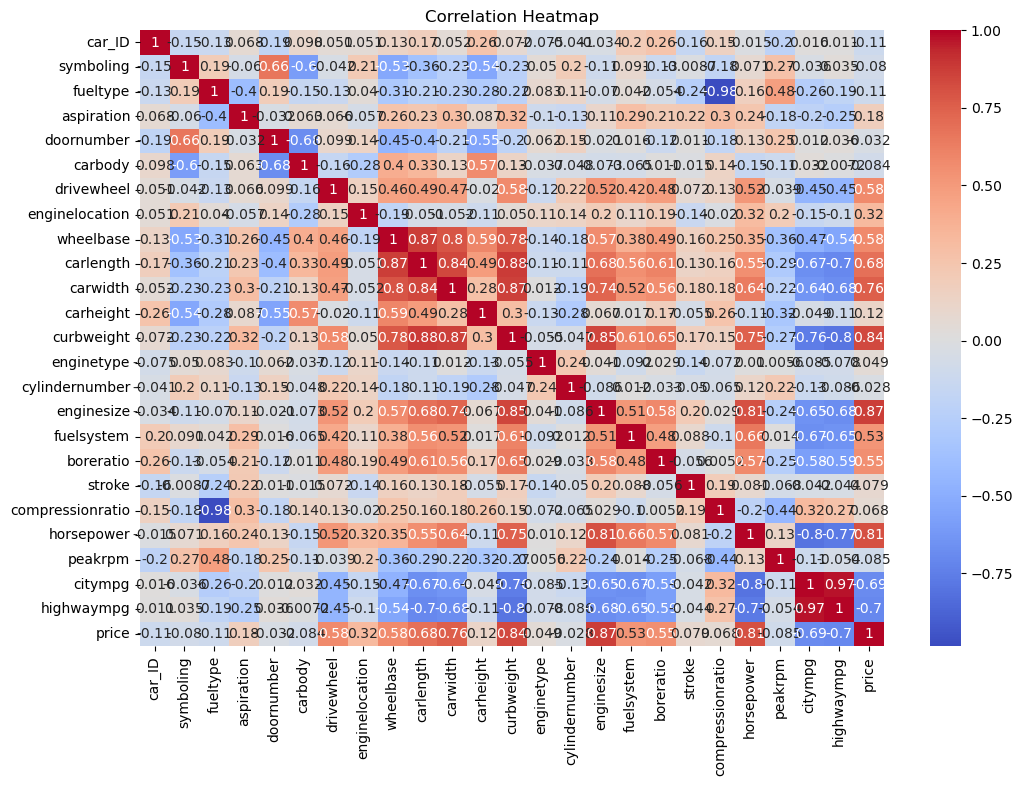

In [18]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

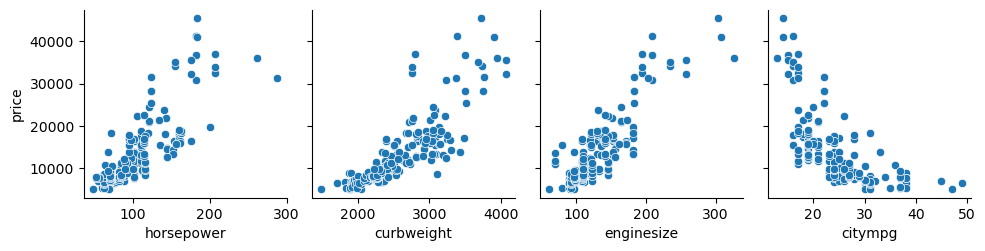

In [28]:
# Scatter plots
sns.pairplot(df, x_vars=['horsepower', 'curbweight', 'enginesize', 'citympg'], y_vars=['price'], kind='scatter')
plt.show()

Analyze categorical variables and their distribution.

C:\Users\EliteBook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


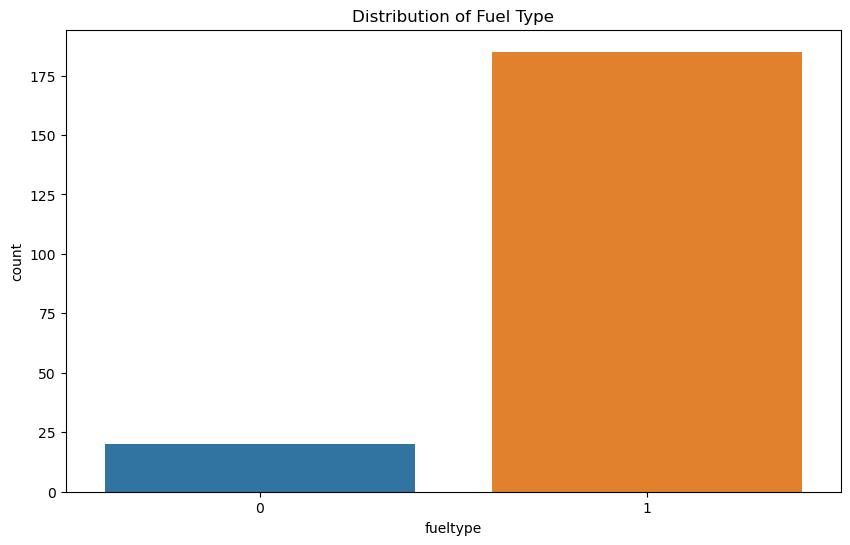

In [29]:
# Countplot of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(df['fueltype'])
plt.title("Distribution of Fuel Type")
plt.show()

Based on our analysis, we found the following distribution of fuel types in the dataset:

- Gas (Petrol) Cars: [belowe 25]
- Diesel Cars: [Above 175]

<h1 style="color:orange;">Data Preprocessing</h2>

In [30]:
# There are non numeric values for some columns. They should be convereted before loading into ML model
le = preprocessing.LabelEncoder()
le.fit(df.fueltype)
df.fueltype = le.transform(df.fueltype)

In [31]:
le.fit(df.aspiration)
df.aspiration = le.transform(df.aspiration)

In [32]:
le.fit(df.doornumber)
df.doornumber = le.transform(df.doornumber)

In [33]:
le.fit(df.carbody)
df.carbody = le.transform(df.carbody)

In [34]:
le.fit(df.drivewheel)
df.drivewheel = le.transform(df.drivewheel)

In [35]:
le.fit(df.enginelocation)
df.enginelocation = le.transform(df.enginelocation)

In [37]:
le.fit(df.enginetype)
df.enginetype = le.transform(df.enginetype)

In [38]:
le.fit(df.cylindernumber)
df.cylindernumber = le.transform(df.cylindernumber)

In [39]:
le.fit(df.fuelsystem)
df.fuelsystem = le.transform(df.fuelsystem)

In [42]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,2,3,alfa-romero,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,3,1,alfa-romero,1,0,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio
3,4,2,audi,1,0,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls
4,5,2,audi,1,0,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [41]:
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


<h1 style="color:orange;">Modelling using Linear Regression</h2>

In [43]:
reg = linear_model.LinearRegression()

ind_var = df[[ 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
dep_var = df.price

reg.fit(ind_var,dep_var)

LinearRegression()

In [44]:
reg.coef_

array([-9.21677014e+03,  2.42352286e+02, -5.13930613e+02, -8.19139857e+02,
        1.16616708e+03,  1.03974427e+04,  1.10593867e+02, -2.91102195e+01,
        7.12602036e+02,  1.84232716e+02,  2.35662037e+00,  1.90948576e+02,
        1.28166071e+02,  1.01622195e+02, -1.48294905e+02, -2.74450799e+03,
       -2.82460445e+03, -5.48092812e+02,  2.06295041e+01,  2.10440991e+00,
       -1.45461967e+02,  1.35183217e+02])

In [45]:
reg.intercept_

-49313.25002503388

In [51]:
reg.predict([[1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,0,13,0,1,0,1,0,2,0,45]])

C:\Users\EliteBook\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12962.15203553])

In [49]:
df['price'][0]

13495.0

<h1 style="color:orange;">Summery</h2>

The predicted price is similar to actual price. So the model works fine